# Airline Customer Survey Hypothesis Testing

## Information

In this hypothesis test study, SFO Customer Survey dataset was used. The purpose of this study is to obtain meaningful inferences by analyzing data sets.
You can found dataset here : https://www.kaggle.com/san-francisco/sfo-customer-survey

# DATA MANIPULATION

In order to upload and edit our dataset, we load our required libraries. Then we load our data sets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('./input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

./input/2013-sfo-customer-survey.csv
./input/2012-sfo-customer-survey.csv
./input/2011-sfo-customer-survey.csv


Loading libraries required for hypothesis processing

In [2]:
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency
from statsmodels.stats.power import ttest_power
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading our data sets

In [3]:
df_2011 = pd.read_csv('./input/2011-sfo-customer-survey.csv')
df_2012 = pd.read_csv('./input/2012-sfo-customer-survey.csv')
df_2013 = pd.read_csv('./input/2013-sfo-customer-survey.csv')

In [ ]:
df_2011.head()

In [ ]:
df_2012.head()

In [ ]:
df_2013.head()

In [70]:
df_2011.shape

(3872, 68)

In [69]:
df_2012.shape 

(3521, 61)

In [71]:
df_2013.shape 

(3535, 95)

When we look at our data sets separately, we see that the column numbers and the information received are not exactly the same. In order to make it more meaningful and stable for us, we will take the columns that are common in all 3 data sets and change the column names to make more sense for us. If you want to skip this step, you need to edit the following pieces of code according to your own data set.
We change the column names to make it more meaningful to us (First for the 2011 dataset)

In [4]:
df_2011_new = df_2011.rename(columns={'Q1' : 'ARRTIME1',
                        'Q1A' : 'ARRTIMESTP',
                        'Q1MIL' : 'ARRTIME',
                        'PASSTIME' : 'WAITTIMEHRS',
                        'PASSMIN' : 'WAITTIMEMIN',
                        'Q2_1' : 'PURTRIP',
                        'Q3_1' : 'TRANSVEC',
                        'Q3A' : 'ISPARK',
                        'Q4A' : 'CHECKBAG',
                        'Q4B' : 'BUYSTR',
                        'Q4C' : 'BUYREST',
                        'Q5' : 'VSTSTR',
                        'Q6' : 'VSTREST',
                        'Q7' : 'FLIGHTNUM',
                        'SAQ' : 'SURVTYPE',
                        'Q8A' : 'RATEART',
                        'Q8B' : 'RATEREST',
                        'Q8C' : 'RATESHOP',
                        'Q8D' : 'RATESIGNS',
                        'Q8E' : 'RATEESCA',
                        'Q8F' : 'RATEINFO',
                        'Q8G' : 'RATEBOOTHLOW',
                        'Q8H' : 'RATEBOOTHHIGH',
                        'Q8I' : 'RATESIGNROAD',
                        'Q8J' : 'RATEPARK',
                        'Q8K' : 'RATETRAIN',
                        'Q8L' : 'RATEPARKLONG',
                        'Q8M' : 'RATERENT',
                        'Q8N' : 'RATE',
                        'Q10A' : 'CLEANBOARD',
                        'Q10B' : 'CLEANGARAGE',
                        'Q10C' : 'CLEANTRAIN',
                        'Q10D' : 'CLEANRENT',
                        'Q10E' : 'CLEANREST',
                        'Q10F' : 'CLEANREROOM',
                        'Q11' : 'ISSAFE',
                        'Q12' : 'USEWEB',
                        'Q13' : 'USEFULLWEB',
                        'Q13A1' : 'AREA1',
                        'Q13A2' : 'AREA2',
                        'Q13A3' : 'AREA3',
                        'Q13A1' : 'WEBPART',
                        'Q14' : 'COMEFROM',
                        'Q15A' : 'ISEASYFIND',
                        'Q15B' : 'ISEASYPASS',
                        'Q16' : 'ANYPROB',
                        'Q17' : 'LIVEWHERE',
                        'Q18STATE' : 'LIVESTATE',
                        'Q18ZIP' : 'LIVEZIP',
                        'Q18COUNTRY' : 'LIVECOUNTRY',
                        'Q19' : 'AGE',
                        'Q20' : 'GENDER',
                        'Q21' : 'INCOME',
                        'MAIL' : 'MAILTAKENBY',
                        'LANG' : 'SURVLANGTYPE',
                        'On-Time Staus of Flight' : 'FLIGHTSTAT'})

We check our new set with changed column names. Our aim here is to arrange the column names in an understandable way for us, by combining the 3 data sets created for each year by bringing them into the same order and as a result, to create a single dataset containing the data in the common area. We discard unwanted columns in our 2011 dataset. (Note: The reason we dispose of these columns is that we want to create a single data set of common columns)

In [5]:
df_2011_new = df_2011_new.drop(['RUNID', 'FLIGHTSTAT', 'TERM', 'ATYPE', 'MAILTAKENBY', 'ARRTIME1', 'ARRTIMESTP', 'WAITTIMEHRS', 'AREA2', 'AREA3', 'COMEFROM', 'LIVESTATE', 'WAITTIMEMIN'], axis=1)

For 2012 dataset:

In [6]:
df_2012_new = df_2012[['RESPNUM', 
                      'CCGID', 
                      'DESTMARK', 
                      'DESTGEO', 
                      'STRATA', 
                      'AIRLINE', 
                      'DEST', 
                      'GATE', 
                      'INTDATE', 
                      'ARRTIME', 
                      'DEPTIME', 
                      'MINUTES', 
                      'Q2PURP1', 
                      'Q3GETTO1',  
                      'Q4BAGS', 
                      'Q4BUY', 
                      'Q4FOOD', 
                      'Q5NOTBUY', 
                      'Q6NOFOOD', 
                      'Q7FLYPERYR', 
                      'SAQ',
                      'Q8A_ART',
                      'Q8B_FOOD',
                      'Q8C_SHOP',
                      'Q8D_SIGNS',
                      'Q8E_WALK',
                      'Q8F_SCREENS',
                      'Q8G_INFOARR',
                      'Q8H_INFODEP',
                      'Q8I_ROAD',
                      'Q8J_PARK',
                      'Q8K_AIRTRAIN',
                      'Q8L_LTPARK',
                      'Q8M_RENTAL',
                      'Q8N_WHOLE',
                      'Q10A_CLNBOARD',
                      'Q10B_CLNPARK',
                      'Q10C_CLNAIRTRAIN',
                      'Q10D_CLNRENT',
                      'Q10E_CLNFOOD',
                      'Q10F_CLNBATH',
                      'Q11SAFE',
                      'Q12_USEWEB',
                      'Q13_RATEWEB',
                      'Q14WHEREDEPART',
                      'Q15A_FIND',
                      'Q15B_SECURITY',
                      'Q16_PROBLEM',
                      'Q17REGION',
                      'Q18ZIP',
                      'Q18COUNTRY',
                      'HOME',
                      'Q19_AGE',
                      'Q20_SEX',
                      'Q21_INCOME',
                      'LANG']]

In [7]:
df_2012_new = df_2012_new.rename(columns={'MINUTES' : 'WAITTIMEMIN',
                        'Q2PURP1' : 'PURTRIP',
                        'Q1MIL' : 'ARRTIMESTPMIL',
                        'Q3GETTO1' : 'TRANSVEC',
                        'Q4BAGS' : 'CHECKBAG',
                        'Q4BUY' : 'BUYSTR',
                        'Q4FOOD' : 'BUYREST',
                        'Q5NOTBUY' : 'VSTSTR',
                        'Q6NOFOOD' : 'VSTREST',
                        'Q7FLYPERYR' : 'FLIGHTNUM',
                        'SAQ' : 'SURVTYPE',
                        'Q8A_ART' : 'RATEART',
                        'Q8B_FOOD' : 'RATEREST',
                        'Q8C_SHOP' : 'RATESHOP',
                        'Q8D_SIGNS' : 'RATESIGNS',
                        'Q8E_WALK' : 'RATEESCA',
                        'Q8F_SCREENS' : 'RATEINFO',
                        'Q8G_INFOARR' : 'RATEBOOTHLOW',
                        'Q8H_INFODEP' : 'RATEBOOTHHIGH',
                        'Q8I_ROAD' : 'RATESIGNROAD',
                        'Q8J_PARK' : 'RATEPARK',
                        'Q8K_AIRTRAIN' : 'RATETRAIN',
                        'Q8L_LTPARK' : 'RATEPARKLONG',
                        'Q8M_RENTAL' : 'RATERENT',
                        'Q8N_WHOLE' : 'RATE',
                        'Q10A_CLNBOARD' : 'CLEANBOARD',
                        'Q10B_CLNPARK' : 'CLEANGARAGE',
                        'Q10C_CLNAIRTRAIN' : 'CLEANTRAIN',
                        'Q10D_CLNRENT' : 'CLEANRENT',
                        'Q10E_CLNFOOD' : 'CLEANREST',
                        'Q10F_CLNBATH' : 'CLEANREROOM',
                        'Q11SAFE' : 'ISSAFE',
                        'Q12_USEWEB' : 'USEWEB',
                        'Q13_RATEWEB' : 'USEFULLWEB',
                        'Q14WHEREDEPART' : 'WEBPART',
                        'Q15A_FIND' : 'ISEASYFIND',
                        'Q15B_SECURITY' : 'ISEASYPASS',
                        'Q16_PROBLEM' : 'ANYPROB',
                        'Q17REGION' : 'LIVEWHERE',
                        'Q18ZIP' : 'LIVEZIP',
                        'Q18COUNTRY' : 'LIVECOUNTRY',
                        'Q19_AGE' : 'AGE',
                        'Q20_SEX' : 'GENDER',
                        'Q21_INCOME' : 'INCOME',
                        'LANG' : 'SURVLANGTYPE'})

We discard the excess columns from our new 2012 dataset

In [8]:
df_2012_new = df_2012_new.drop(['WAITTIMEMIN', 'CLEANGARAGE', 'USEFULLWEB', 'WEBPART', 'VSTSTR', 'VSTREST'], axis=1)

When we check again, we find that there are non-common columns in our 2011 dataset and discard them.

In [9]:
df_2011_new = df_2011_new.drop(['CLEANGARAGE', 'USEFULLWEB', 'WEBPART', 'VSTSTR', 'VSTREST'], axis=1)

For 2013 dataset:

In [10]:
df_2013_new = df_2013.rename(columns={
                        'Q2PURP1' : 'PURTRIP',
                        'Q3GETTO1' : 'TRANSVEC',
                        'Q4BAGS' : 'CHECKBAG',
                        'Q4BUY' : 'BUYSTR',
                        'Q4FOOD' : 'BUYREST',
                        'Q5FLYPERYR' : 'FLIGHTNUM',
                        'SAQ' : 'SURVTYPE',
                        'Q7A_ART' : 'RATEART',
                        'Q7B_FOOD' : 'RATEREST',
                        'Q7C_SHOPS' : 'RATESHOP',
                        'Q7D_SIGNS' : 'RATESIGNS',
                        'Q7E_WALK' : 'RATEESCA',
                        'Q7F_SCREENS' : 'RATEINFO',
                        'Q7G_INFOARR' : 'RATEBOOTHLOW',
                        'Q7H_INFODEP' : 'RATEBOOTHHIGH',
                        'Q7J_ROAD' : 'RATESIGNROAD',
                        'Q7K_PARK' : 'RATEPARK',
                        'Q7L_AIRTRAIN' : 'RATETRAIN',
                        'Q7M_LTPARK' : 'RATEPARKLONG',
                        'Q7N_RENTAL' : 'RATERENT',
                        'Q7O_WHOLE' : 'RATE',
                        'Q9A_CLNBOARD' : 'CLEANBOARD',
                        'Q9B_CLNAIRTRAIN' : 'CLEANTRAIN',
                        'Q9C_CLNRENT' : 'CLEANRENT',
                        'Q9D_CLNFOOD' : 'CLEANREST',
                        'Q9E_CLNBATH' : 'CLEANREROOM',
                        'Q10SAFE' : 'ISSAFE',
                        'Q11A_USEWEB' : 'USEWEB',
                        'Q14A_FIND' : 'ISEASYFIND',
                        'Q14B_SECURITY' : 'ISEASYPASS',
                        'Q15_PROBLEMS' : 'ANYPROB',
                        'Q16_REGION' : 'LIVEWHERE',
                        'Q17_ZIP' : 'LIVEZIP',
                        'Q17_COUNTRY' : 'LIVECOUNTRY',
                        'Q18_AGE' : 'AGE',
                        'Q19_SEX' : 'GENDER',
                        'Q20_INCOME' : 'INCOME',
                        'LANG' : 'SURVLANGTYPE'})

In [11]:
df_2013_new = df_2013_new[['RESPNUM', 
                          'CCGID', 
                          'DESTMARK', 
                          'DESTGEO', 
                          'STRATA',
                          'AIRLINE',
                          'DEST',
                          'GATE',
                          'INTDATE',
                          'ARRTIME',
                          'DEPTIME',
                          'PURTRIP',
                          'TRANSVEC',
                          'CHECKBAG',
                          'BUYSTR',
                          'BUYREST',
                          'FLIGHTNUM',
                          'SURVTYPE',
                          'RATEART',
                          'RATEREST',
                          'RATESHOP',
                          'RATESIGNS',
                          'RATEESCA',
                          'RATEINFO',
                          'RATEBOOTHLOW',
                          'RATEBOOTHHIGH',
                          'RATESIGNROAD',
                          'RATEPARK',
                          'RATETRAIN',
                          'RATEPARKLONG',
                          'RATERENT',
                          'RATE',
                          'CLEANBOARD',
                          'CLEANTRAIN',
                          'CLEANRENT',
                          'CLEANREST',
                          'CLEANREROOM',
                          'ISSAFE',
                          'USEWEB',
                          'ISEASYFIND',
                          'ISEASYPASS',
                          'ANYPROB',
                          'LIVEWHERE',
                          'LIVEZIP',
                          'LIVECOUNTRY',
                          'HOME',
                          'AGE',
                          'GENDER',
                          'INCOME',
                          'SURVLANGTYPE']]

Then we define a column where there are times to indicate in which year the survey was taken.

In [12]:
df_2011_new['YEAR'] = 2011
df_2012_new['YEAR'] = 2012
df_2013_new['YEAR'] = 2013

We check our columns and edit incorrect or corrupt data.

In [13]:
# Get names of indexes for which column ARRTIME has value 'N'
indexNames = df_2011_new[df_2011_new['ARRTIME'] == 'N'].index
indexNames2 = df_2012_new[df_2012_new['ARRTIME'] == 'N'].index
indexNames3 = df_2013_new[df_2013_new['ARRTIME'] == 'N'].index
indexNames4 = df_2012_new[df_2012_new['ARRTIME'] == '3:30 3'].index

# Delete these row indexes from dataframes
df_2011_new.drop(indexNames, inplace = True)
df_2012_new.drop(indexNames2, inplace = True)
df_2013_new.drop(indexNames3, inplace = True)
df_2012_new.drop(indexNames4, inplace = True)

The data received during this survey only entered the postal code values for America. So all values are empty for other countries. That's why it has lost its value for us because we want to make an analysis that includes all countries.

**If you want to fill the empty spaces with a value that is meaningful to you instead of deleting this column, the code below will do this for you.**

In [14]:
"""

# We're filling the LIVEZIP column with 10000 value where columns LIVECOUNTRY is not 'US'

df_2012_new['LIVEZIP'] = np.where((df_2012_new['LIVECOUNTRY'] != 'US'), #For rows with LIVECOUNTRY != US
                           10000,      #We place 10000 value
                           df_2012_new['LIVEZIP'])
 

df_2011_new['LIVEZIP'] = np.where((df_2011_new['LIVECOUNTRY'] != 'US'), #For rows with LIVECOUNTRY != US
                           10000,      #We place 10000 value
                           df_2011_new['LIVEZIP'])


df_2013_new['LIVEZIP'] = np.where((df_2013_new['LIVECOUNTRY'] != 'US'), #For rows with LIVECOUNTRY != US
                           10000,      #We place 10000 value
                           df_2013_new['LIVEZIP']) 
"""

"\n\n# We're filling the LIVEZIP column with 10000 value where columns LIVECOUNTRY is not 'US'\n\ndf_2012_new['LIVEZIP'] = np.where((df_2012_new['LIVECOUNTRY'] != 'US'), #For rows with LIVECOUNTRY != US\n                           10000,      #We place 10000 value\n                           df_2012_new['LIVEZIP'])\n \n\ndf_2011_new['LIVEZIP'] = np.where((df_2011_new['LIVECOUNTRY'] != 'US'), #For rows with LIVECOUNTRY != US\n                           10000,      #We place 10000 value\n                           df_2011_new['LIVEZIP'])\n\n\ndf_2013_new['LIVEZIP'] = np.where((df_2013_new['LIVECOUNTRY'] != 'US'), #For rows with LIVECOUNTRY != US\n                           10000,      #We place 10000 value\n                           df_2013_new['LIVEZIP']) \n"

When we look at the entered values of the surveys conducted in different years, one is in the 12-hour type and the other in the 24-hour type. We need to organize them in one type.
After clearing our data set, we need to convert it to 12 hours data type as in the other year data sets, so that we can give the required time type.

In [15]:
# We are manipulating time value from 24 hour to 12 hour aslike 2012 and 2013 data time types for the ARRTIME column
from datetime import datetime as dt
a = []
for x in df_2011_new.ARRTIME:
  d = dt.strptime(x, '%H:%M')
  a.append(d.strftime('%I:%M %p'))

# For the DEPTIME column
b = []
for y in df_2011_new.DEPTIME:
  d = dt.strptime(y, '%H:%M')
  b.append(d.strftime('%I:%M %p'))

# We are assigning to columns

df_2011_new.ARRTIME = a
df_2011_new.DEPTIME = b  

In [16]:
c = []
for x in df_2012_new.ARRTIME:
  d = dt.strptime(x, '%H:%M')
  c.append(d.strftime('%I:%M %p'))

# For the DEPTIME column
e = []
for y in df_2012_new.DEPTIME:
  d = dt.strptime(y, '%H:%M')
  e.append(d.strftime('%I:%M %p'))

# We are assigning to columns

df_2012_new.ARRTIME = c
df_2012_new.DEPTIME = e 

In the original 2012 dataset, there is an extra value entered in the 'ARRTIME' column, if we do not convert this value to the format it should be, we will get an error constantly, so we delete our 'ARRTIME' value of '3:30 3'. (Note: We have already done this operation in the previous stage. )

After putting our data sets in the same order, we can now combine them.

In [17]:
dataset = [df_2011_new, df_2012_new, df_2013_new]
df = pd.concat(dataset)

In [18]:
df = df.drop(['LIVEZIP'], axis=1)

In [19]:
df.tail()

,RESPNUM,CCGID,DESTMARK,DESTGEO,STRATA,AIRLINE,DEST,GATE,INTDATE,ARRTIME,DEPTIME,PURTRIP,TRANSVEC,CHECKBAG,BUYSTR,BUYREST,FLIGHTNUM,SURVTYPE,RATEART,RATEREST,RATESHOP,RATESIGNS,RATEESCA,RATEINFO,RATEBOOTHLOW,RATEBOOTHHIGH,RATESIGNROAD,RATEPARK,RATETRAIN,RATEPARKLONG,RATERENT,RATE,CLEANBOARD,CLEANTRAIN,CLEANRENT,CLEANREST,CLEANREROOM,ISSAFE,USEWEB,ISEASYFIND,ISEASYPASS,ANYPROB,LIVEWHERE,LIVECOUNTRY,HOME,AGE,GENDER,INCOME,SURVLANGTYPE,YEAR
3530,9991,9001.0,4,1,1,33,50,98,2,6:30 AM,7:47 AM,5,4,2,2,2,1,2,6,4,3,2,3,3,6,6,6,6,6,6,6,5,5,6,6,5,5,5,3,1,5,2,3,ISRAEL,17,5,1,4,1,2013
3531,9992,491.0,4,6,2,25,32,101,17,12:50 AM,2:55 PM,3,2,1,2,2,3,2,3,6,4,5,5,4,4,4,4,4,6,6,6,4,4,6,6,6,4,4,1,5,3,3,1,US,90,4,2,0,1,2013
3532,9993,9002.0,2,1,3,7,74,20,10,4:05 AM,5:05 PM,1,4,2,2,2,6,2,6,3,3,4,6,4,6,6,6,6,6,6,6,3,3,6,6,6,3,4,1,5,5,2,3,US,10,4,1,3,1,2013
3533,9994,9003.0,4,1,3,29,50,30,8,6:00 AM,7:10 PM,1,4,1,2,2,4,2,5,4,2,6,5,5,6,6,4,3,4,6,6,4,5,5,6,4,4,5,1,4,5,2,1,US,1,3,1,3,1,2013
3534,9995,9004.0,4,1,3,33,46,68,14,3:00 PM,5:23 PM,1,5,2,2,1,1,2,4,4,4,3,3,4,6,3,3,6,3,6,6,3,3,3,6,3,6,3,1,4,3,2,2,US,91,0,0,0,1,2013


In [20]:
df.shape

(10535, 50)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10535 entries, 0 to 3534
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RESPNUM        10535 non-null  int64  
 1   CCGID          10522 non-null  float64
 2   DESTMARK       10535 non-null  int64  
 3   DESTGEO        10535 non-null  int64  
 4   STRATA         10535 non-null  int64  
 5   AIRLINE        10535 non-null  int64  
 6   DEST           10535 non-null  object 
 7   GATE           10535 non-null  int64  
 8   INTDATE        10535 non-null  int64  
 9   ARRTIME        10535 non-null  object 
 10  DEPTIME        10535 non-null  object 
 11  PURTRIP        10535 non-null  int64  
 12  TRANSVEC       10535 non-null  int64  
 13  CHECKBAG       10535 non-null  int64  
 14  BUYSTR         10535 non-null  int64  
 15  BUYREST        10535 non-null  int64  
 16  FLIGHTNUM      10535 non-null  int64  
 17  SURVTYPE       10535 non-null  int64  
 18  RATEART

In [22]:
df.dtypes

RESPNUM            int64
CCGID            float64
DESTMARK           int64
DESTGEO            int64
STRATA             int64
AIRLINE            int64
DEST              object
GATE               int64
INTDATE            int64
ARRTIME           object
DEPTIME           object
PURTRIP            int64
TRANSVEC           int64
CHECKBAG           int64
BUYSTR             int64
BUYREST            int64
FLIGHTNUM          int64
SURVTYPE           int64
RATEART            int64
RATEREST           int64
RATESHOP           int64
RATESIGNS          int64
RATEESCA           int64
RATEINFO           int64
RATEBOOTHLOW       int64
RATEBOOTHHIGH      int64
RATESIGNROAD       int64
RATEPARK           int64
RATETRAIN          int64
RATEPARKLONG       int64
RATERENT           int64
RATE               int64
CLEANBOARD         int64
CLEANTRAIN         int64
CLEANRENT          int64
CLEANREST          int64
CLEANREROOM        int64
ISSAFE             int64
USEWEB             int64
ISEASYFIND         int64


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RESPNUM,10535.0,2023.987470,1275.573208,1.0,905.0,2049.0,3006.00,9995.0
CCGID,10522.0,1931.861528,1172.603109,1.0,922.0,1827.0,2963.75,9004.0
DESTMARK,10535.0,2.999146,1.035949,1.0,2.0,3.0,4.00,4.0
DESTGEO,10535.0,3.025154,2.302011,1.0,1.0,2.0,4.00,9.0
STRATA,10535.0,1.972283,0.770018,1.0,1.0,2.0,3.00,3.0
AIRLINE,10535.0,22.460180,10.638560,2.0,12.0,26.0,32.00,42.0
GATE,10535.0,50.417940,32.068551,1.0,23.0,51.0,82.00,102.0
INTDATE,10535.0,8.505458,4.579275,1.0,5.0,8.0,12.00,19.0
PURTRIP,10535.0,2.265496,1.500408,1.0,1.0,2.0,3.00,13.0
TRANSVEC,10535.0,4.191932,2.642195,1.0,2.0,3.0,6.00,16.0


In [24]:
df.isnull().values.any()

True

As you can see above, we have combined our data sets. And we saw that we had missing data. After that it will continue with data discovery and handling missing data

In [25]:
df.isna().sum()

RESPNUM            0
CCGID             13
DESTMARK           0
DESTGEO            0
STRATA             0
AIRLINE            0
DEST               0
GATE               0
INTDATE            0
ARRTIME            0
DEPTIME            0
PURTRIP            0
TRANSVEC           0
CHECKBAG           0
BUYSTR             0
BUYREST            0
FLIGHTNUM          0
SURVTYPE           0
RATEART            0
RATEREST           0
RATESHOP           0
RATESIGNS          0
RATEESCA           0
RATEINFO           0
RATEBOOTHLOW       0
RATEBOOTHHIGH      0
RATESIGNROAD       0
RATEPARK           0
RATETRAIN          0
RATEPARKLONG       0
RATERENT           0
RATE               0
CLEANBOARD         0
CLEANTRAIN         0
CLEANRENT          0
CLEANREST          0
CLEANREROOM        0
ISSAFE             0
USEWEB             0
ISEASYFIND         0
ISEASYPASS         0
ANYPROB            0
LIVEWHERE          0
LIVECOUNTRY      483
HOME               0
AGE                0
GENDER             0
INCOME       

In the explanation document belonging to our data set, we have been informed that CCGID value may not statistically make sense and there are null values for this column in our data. For this reason, we can delete 13 data that appear blank.

In [26]:
df.dropna(subset=['CCGID'], inplace=True)

After deleting the null values we will complete the neccessary columns that we know what the value is:

We have given the value 'UNKNOWN', which is a single value for the values of countries not entered in our data set. When we see this value, we understand that the country value of that person has not been entered.

In [27]:
df["LIVECOUNTRY"].fillna("UNKNOWN", inplace = True)

In [28]:
df.isna().sum()

RESPNUM          0
CCGID            0
DESTMARK         0
DESTGEO          0
STRATA           0
AIRLINE          0
DEST             0
GATE             0
INTDATE          0
ARRTIME          0
DEPTIME          0
PURTRIP          0
TRANSVEC         0
CHECKBAG         0
BUYSTR           0
BUYREST          0
FLIGHTNUM        0
SURVTYPE         0
RATEART          0
RATEREST         0
RATESHOP         0
RATESIGNS        0
RATEESCA         0
RATEINFO         0
RATEBOOTHLOW     0
RATEBOOTHHIGH    0
RATESIGNROAD     0
RATEPARK         0
RATETRAIN        0
RATEPARKLONG     0
RATERENT         0
RATE             0
CLEANBOARD       0
CLEANTRAIN       0
CLEANRENT        0
CLEANREST        0
CLEANREROOM      0
ISSAFE           0
USEWEB           0
ISEASYFIND       0
ISEASYPASS       0
ANYPROB          0
LIVEWHERE        0
LIVECOUNTRY      0
HOME             0
AGE              0
GENDER           0
INCOME           0
SURVLANGTYPE     0
YEAR             0
dtype: int64

In [29]:
df.isnull().values.any()

False

In [30]:
df.head(10)

,RESPNUM,CCGID,DESTMARK,DESTGEO,STRATA,AIRLINE,DEST,GATE,INTDATE,ARRTIME,DEPTIME,PURTRIP,TRANSVEC,CHECKBAG,BUYSTR,BUYREST,FLIGHTNUM,SURVTYPE,RATEART,RATEREST,RATESHOP,RATESIGNS,RATEESCA,RATEINFO,RATEBOOTHLOW,RATEBOOTHHIGH,RATESIGNROAD,RATEPARK,RATETRAIN,RATEPARKLONG,RATERENT,RATE,CLEANBOARD,CLEANTRAIN,CLEANRENT,CLEANREST,CLEANREROOM,ISSAFE,USEWEB,ISEASYFIND,ISEASYPASS,ANYPROB,LIVEWHERE,LIVECOUNTRY,HOME,AGE,GENDER,INCOME,SURVLANGTYPE,YEAR
0,440,1.0,4,1,1,25,LAS VEGAS,25,2,08:56 AM,10:25 AM,2,1,2,1,1,2,1,4,4,4,4,4,5,6,6,4,5,6,5,6,4,4,6,6,4,4,5,2,5,5,2,1,US,1,5,1,3,1,2011
1,441,2.0,4,1,1,25,LAS VEGAS,25,2,08:45 AM,10:25 AM,3,5,2,2,1,1,1,6,4,6,4,5,3,4,2,5,3,5,6,6,4,5,5,6,5,5,2,2,4,5,2,1,US,2,2,1,1,1,2011
2,442,3.0,4,1,1,25,LAS VEGAS,25,2,08:15 AM,10:25 AM,2,2,3,2,2,1,1,6,6,3,4,3,6,6,3,2,6,6,6,6,3,3,6,6,6,6,4,2,5,5,2,3,US,10,7,2,0,1,2011
3,443,4.0,4,1,1,25,LAS VEGAS,25,2,08:00 AM,10:25 AM,1,4,1,2,1,1,1,5,4,4,4,6,6,6,6,5,6,6,6,6,5,5,6,6,5,6,5,2,5,4,2,3,US,10,2,2,1,1,2011
4,444,5.0,4,1,1,25,LAS VEGAS,25,2,08:30 AM,10:25 AM,2,2,1,1,1,3,2,5,3,3,4,4,4,6,6,4,4,4,4,4,4,5,4,4,4,4,5,1,5,5,2,1,US,2,5,2,0,1,2011
5,445,6.0,4,1,1,25,LAS VEGAS,25,2,09:20 AM,10:25 AM,3,2,1,2,2,2,2,3,4,4,4,3,4,4,4,3,3,2,6,2,3,2,3,0,3,3,4,2,4,1,1,3,US,11,6,2,3,1,2011
6,446,7.0,4,1,1,25,LAS VEGAS,25,2,09:00 AM,10:25 AM,3,6,1,2,1,2,2,3,3,4,5,0,5,4,4,0,0,6,6,6,4,4,6,6,4,5,5,2,5,5,2,3,AUSTRALIA,19,4,1,2,1,2011
7,447,8.0,4,1,1,25,LAS VEGAS,25,2,09:25 AM,10:25 AM,3,2,1,0,0,2,2,6,6,5,5,5,6,6,6,5,6,6,6,6,5,5,6,6,6,5,5,2,5,5,2,1,US,1,5,1,2,1,2011
8,646,9.0,4,1,2,25,PHOENIX,23,2,09:00 AM,11:25 AM,2,6,1,2,2,1,1,6,5,5,5,6,5,6,5,6,6,6,6,6,5,5,6,6,6,6,5,2,5,5,2,3,US,11,5,2,2,1,2011
9,647,10.0,4,1,2,25,PHOENIX,23,2,07:00 AM,11:25 AM,3,3,1,1,1,2,1,4,3,3,5,5,5,6,5,6,6,6,6,6,4,3,5,6,3,3,5,1,5,5,2,4,US,12,2,2,1,1,2011


Now that we have created our data set, we can now make edits in bulk. Before proceeding to our hypothesis test, we need to make sure that the types and values of our data are correct, so we check and correct the wrong ones.

In [31]:
df.head()

,RESPNUM,CCGID,DESTMARK,DESTGEO,STRATA,AIRLINE,DEST,GATE,INTDATE,ARRTIME,DEPTIME,PURTRIP,TRANSVEC,CHECKBAG,BUYSTR,BUYREST,FLIGHTNUM,SURVTYPE,RATEART,RATEREST,RATESHOP,RATESIGNS,RATEESCA,RATEINFO,RATEBOOTHLOW,RATEBOOTHHIGH,RATESIGNROAD,RATEPARK,RATETRAIN,RATEPARKLONG,RATERENT,RATE,CLEANBOARD,CLEANTRAIN,CLEANRENT,CLEANREST,CLEANREROOM,ISSAFE,USEWEB,ISEASYFIND,ISEASYPASS,ANYPROB,LIVEWHERE,LIVECOUNTRY,HOME,AGE,GENDER,INCOME,SURVLANGTYPE,YEAR
0,440,1.0,4,1,1,25,LAS VEGAS,25,2,08:56 AM,10:25 AM,2,1,2,1,1,2,1,4,4,4,4,4,5,6,6,4,5,6,5,6,4,4,6,6,4,4,5,2,5,5,2,1,US,1,5,1,3,1,2011
1,441,2.0,4,1,1,25,LAS VEGAS,25,2,08:45 AM,10:25 AM,3,5,2,2,1,1,1,6,4,6,4,5,3,4,2,5,3,5,6,6,4,5,5,6,5,5,2,2,4,5,2,1,US,2,2,1,1,1,2011
2,442,3.0,4,1,1,25,LAS VEGAS,25,2,08:15 AM,10:25 AM,2,2,3,2,2,1,1,6,6,3,4,3,6,6,3,2,6,6,6,6,3,3,6,6,6,6,4,2,5,5,2,3,US,10,7,2,0,1,2011
3,443,4.0,4,1,1,25,LAS VEGAS,25,2,08:00 AM,10:25 AM,1,4,1,2,1,1,1,5,4,4,4,6,6,6,6,5,6,6,6,6,5,5,6,6,5,6,5,2,5,4,2,3,US,10,2,2,1,1,2011
4,444,5.0,4,1,1,25,LAS VEGAS,25,2,08:30 AM,10:25 AM,2,2,1,1,1,3,2,5,3,3,4,4,4,6,6,4,4,4,4,4,4,5,4,4,4,4,5,1,5,5,2,1,US,2,5,2,0,1,2011


In [32]:
print('The total number of rows :', df.shape[0])
print('The total number of columns :', df.shape[1])

The total number of rows : 10522
The total number of columns : 50


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10522 entries, 0 to 3534
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RESPNUM        10522 non-null  int64  
 1   CCGID          10522 non-null  float64
 2   DESTMARK       10522 non-null  int64  
 3   DESTGEO        10522 non-null  int64  
 4   STRATA         10522 non-null  int64  
 5   AIRLINE        10522 non-null  int64  
 6   DEST           10522 non-null  object 
 7   GATE           10522 non-null  int64  
 8   INTDATE        10522 non-null  int64  
 9   ARRTIME        10522 non-null  object 
 10  DEPTIME        10522 non-null  object 
 11  PURTRIP        10522 non-null  int64  
 12  TRANSVEC       10522 non-null  int64  
 13  CHECKBAG       10522 non-null  int64  
 14  BUYSTR         10522 non-null  int64  
 15  BUYREST        10522 non-null  int64  
 16  FLIGHTNUM      10522 non-null  int64  
 17  SURVTYPE       10522 non-null  int64  
 18  RATEART

In [34]:
print(df.isna().sum())
print('===================')
print(df.isnull().sum())
print('===================')
print('**CONCLUSION**: As seen from the data above, we conclude there are **"NO Missing"** values in the data')

RESPNUM          0
CCGID            0
DESTMARK         0
DESTGEO          0
STRATA           0
AIRLINE          0
DEST             0
GATE             0
INTDATE          0
ARRTIME          0
DEPTIME          0
PURTRIP          0
TRANSVEC         0
CHECKBAG         0
BUYSTR           0
BUYREST          0
FLIGHTNUM        0
SURVTYPE         0
RATEART          0
RATEREST         0
RATESHOP         0
RATESIGNS        0
RATEESCA         0
RATEINFO         0
RATEBOOTHLOW     0
RATEBOOTHHIGH    0
RATESIGNROAD     0
RATEPARK         0
RATETRAIN        0
RATEPARKLONG     0
RATERENT         0
RATE             0
CLEANBOARD       0
CLEANTRAIN       0
CLEANRENT        0
CLEANREST        0
CLEANREROOM      0
ISSAFE           0
USEWEB           0
ISEASYFIND       0
ISEASYPASS       0
ANYPROB          0
LIVEWHERE        0
LIVECOUNTRY      0
HOME             0
AGE              0
GENDER           0
INCOME           0
SURVLANGTYPE     0
YEAR             0
dtype: int64
RESPNUM          0
CCGID            0

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RESPNUM,10522.0,2023.895742,1276.031327,1.0,904.0,2050.0,3006.75,9995.0
CCGID,10522.0,1931.861528,1172.603109,1.0,922.0,1827.0,2963.75,9004.0
DESTMARK,10522.0,2.998860,1.035901,1.0,2.0,3.0,4.00,4.0
DESTGEO,10522.0,3.026231,2.302946,1.0,1.0,2.0,4.00,9.0
STRATA,10522.0,1.972059,0.769869,1.0,1.0,2.0,3.00,3.0
AIRLINE,10522.0,22.467972,10.638006,2.0,12.0,26.0,32.00,42.0
GATE,10522.0,50.431382,32.083058,1.0,23.0,51.0,82.00,102.0
INTDATE,10522.0,8.505227,4.580700,1.0,5.0,8.0,12.00,19.0
PURTRIP,10522.0,2.265824,1.500799,1.0,1.0,2.0,3.00,13.0
TRANSVEC,10522.0,4.191884,2.641879,1.0,2.0,3.0,6.00,16.0


In [77]:
df_copy1 = df[['LIVEWHERE', 'ISSAFE', 'GENDER', 'RATEREST', 'RATESHOP', 'INCOME', 'RATE', 'AIRLINE','AGE']]
df_copy1.describe().T

,count,mean,std,min,25%,50%,75%,max
LIVEWHERE,10522.0,2.400969,1.104351,0.0,1.0,3.0,3.0,4.0
ISSAFE,10522.0,4.348888,0.875385,0.0,4.0,5.0,5.0,6.0
GENDER,10522.0,1.432807,0.582268,0.0,1.0,1.0,2.0,3.0
RATEREST,10522.0,3.961319,1.345512,0.0,3.0,4.0,5.0,6.0
RATESHOP,10522.0,3.907717,1.385472,0.0,3.0,4.0,5.0,6.0
INCOME,10522.0,2.046094,1.448828,0.0,1.0,2.0,3.0,5.0
RATE,10522.0,3.860578,1.042964,0.0,4.0,4.0,4.0,6.0
AIRLINE,10522.0,22.467972,10.638006,2.0,12.0,26.0,32.0,42.0
AGE,10522.0,4.282931,1.693924,0.0,3.0,4.0,6.0,9.0


__Obervations based on 5 Point Summary__

1. **Age**: 
    It looks evenly distributed as can be seen with values of min, Q1, Q2, Q3, max, and also since mean and median we can say almost same.
    
    1.1. **Age**:
    Since the min =0 and max value = 9 i.e. with the values of 0,1,2,3,4,5,6,7,8,9, it looks more like a Categorical attribute than continuous.

2. **Income**:
    It looks evenly distributed when you take into account Q1,Q2,Q3. There are few outliers at the top beginning of values,
    
    For eg.,
    IQR = 3 - 1 = 2. Max = 1.5 * IQR = 1.5 * 2 = 3. 
    top whisker = 3 + 3 = 6        
    Since max values (5) is less than top whisker, it is an outlier. And there may be more outliers. 
    
    This will be more clear with a boxplot, which will be shown later in this document.


The categorical data received during these surveys were represented by number and processed. So there is not much column on this data set that we need to change its type.

## Distribution of ‘AIRLINE’, ‘AGE’ and ‘INCOME’ columns

Text(0.5, 0, 'Incomes')

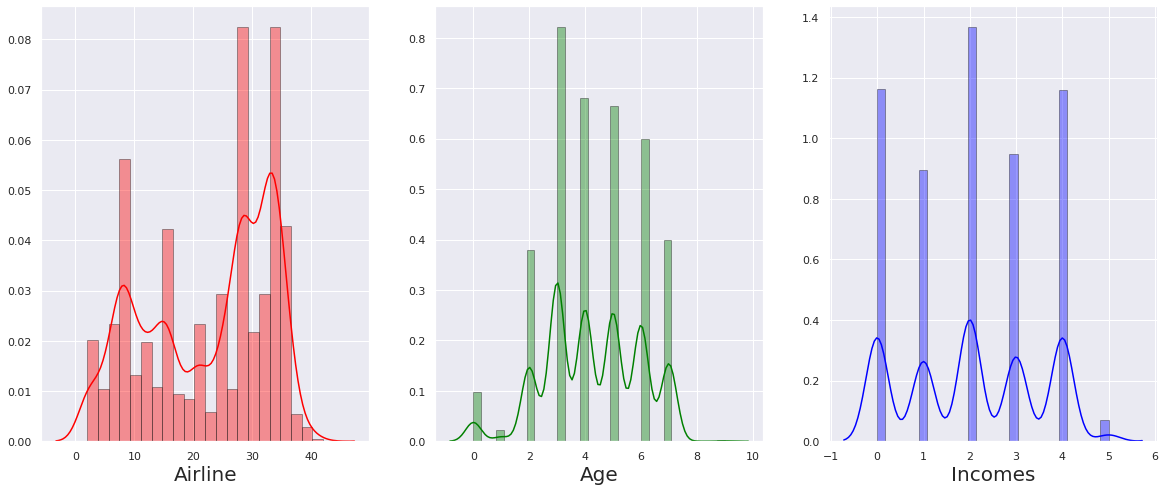

In [36]:
f, axes = plt.subplots(1, 3, figsize=(20, 8))
airline = sns.distplot(df['AIRLINE'], color="red", ax=axes[0], kde=True, hist_kws={"edgecolor":"k"})
airline.set_xlabel("Airline",fontsize=20)

age = sns.distplot(df['AGE'], color='green', ax = axes[1], kde=True, hist_kws={"edgecolor":"k"})
age.set_xlabel("Age",fontsize=20)

income = sns.distplot(df['INCOME'], color='blue', ax = axes[2], kde=True, hist_kws={"edgecolor":"k"})
income.set_xlabel("Incomes",fontsize=20)

## Measure of skewness of ‘AIRLINE’, ‘AGE’ and ‘INCOME’ columns

In [37]:
pd.DataFrame.from_dict(dict(
    {
        'airline':df.AIRLINE.skew(), 
        'age': df.AGE.skew(), 
        'income': df.INCOME.skew()
    }), orient='index', columns=['Skewness'])

,Skewness
airline,-0.396747
age,-0.176759
income,0.018320


1. **AIRLINE** : Value is less, and hence evenly distributed as shown in the plot above.(Left skewed)
2. **AGE** : Value is less, and hence evenly distributed as shown in the plot above. (Left Skewed)
3. **INCOME**: Values is close to 0, hence uniformly distributed as shown in the plot above.

## g. Checking the presence of outliers in ‘AIRLINE’, ‘AGE’ and ‘INCOME' columns

Text(0.5, 0, 'Income')

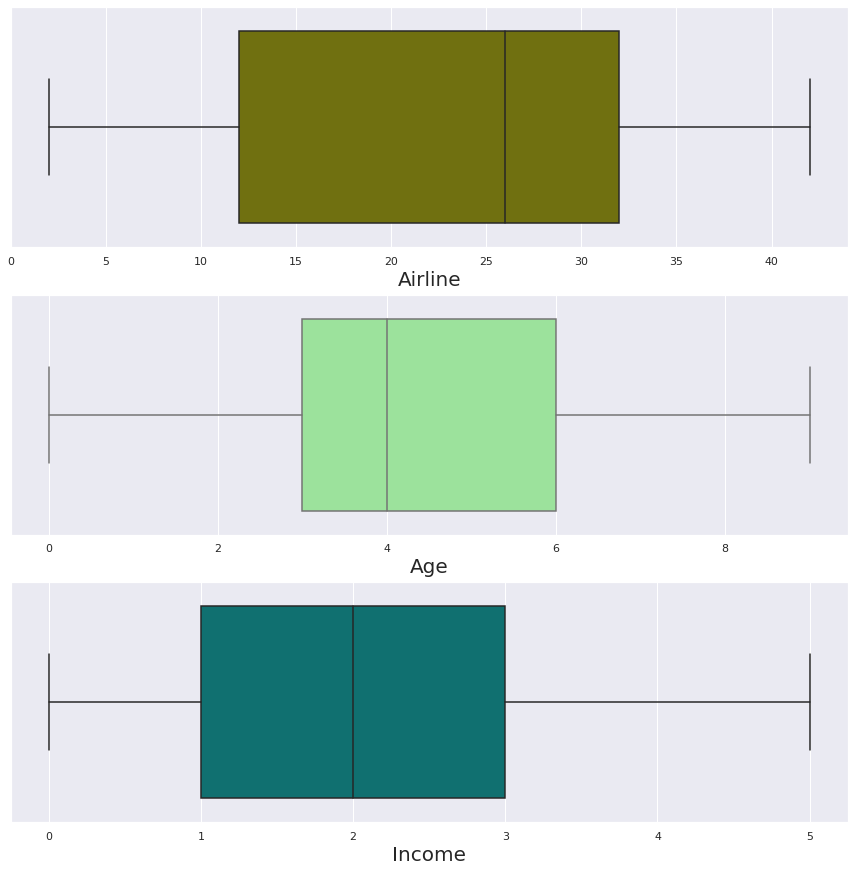

In [38]:
f, axes = plt.subplots(3, 1, figsize=(15, 15))
airline = sns.boxplot(df['AIRLINE'], color="olive", ax=axes[0])
airline.set_xlabel("Airline",fontsize=20)

age = sns.boxplot(df['AGE'], color='lightgreen', ax=axes[1])
age.set_xlabel("Age",fontsize=20)

income = sns.boxplot(df['INCOME'], color='teal', ax=axes[2])
income.set_xlabel("Income",fontsize=20)

1. **Airline** : No outliers and uniformly distributed
2. **Age** : No outliers and normaly distributed.
3. **Income**: No outliers uniformly distributed

Text(0.5, 0, 'Live')

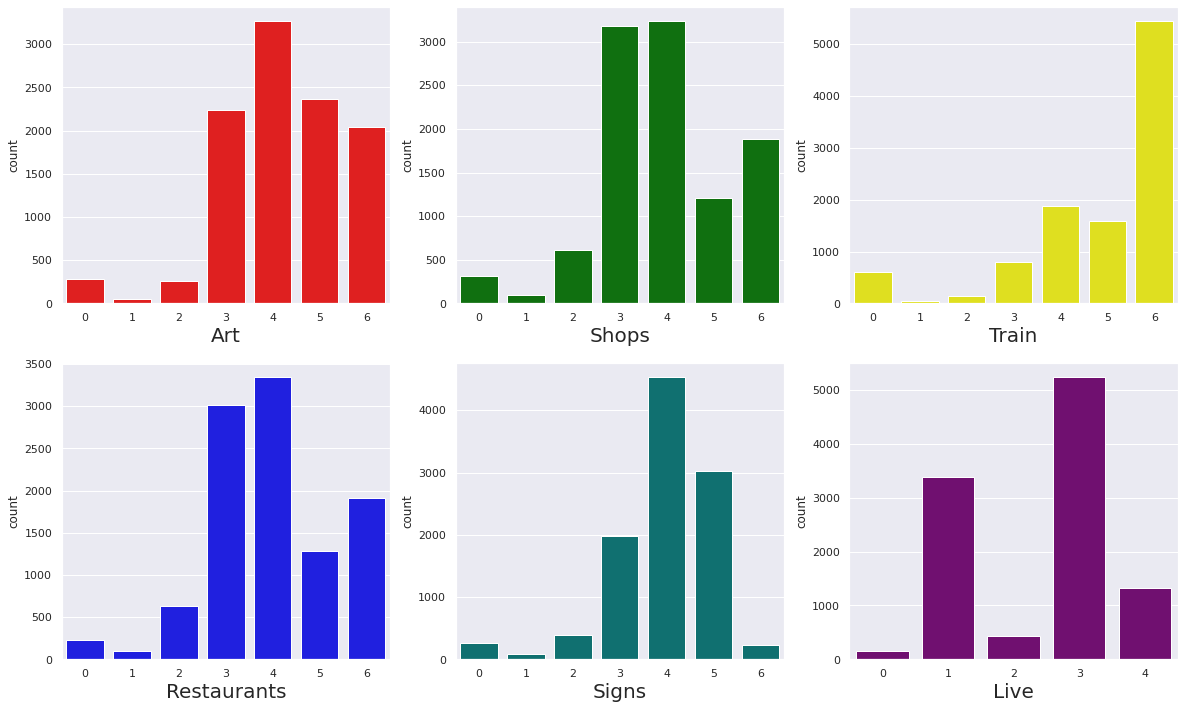

In [39]:
f, axes = plt.subplots(2, 3, figsize=(20, 12))
art = sns.countplot(df['RATEART'], color="red", ax=axes[0,0])
art.set_xlabel("Art",fontsize=20)

shops = sns.countplot(df['RATESHOP'], color='green', ax = axes[0,1])
shops.set_xlabel("Shops",fontsize=20)

restaurants = sns.countplot(df['RATEREST'], color='blue', ax = axes[1,0])
restaurants.set_xlabel("Restaurants",fontsize=20)

signs = sns.countplot(df['RATESIGNS'], color='teal', ax = axes[1,1])
signs.set_xlabel("Signs",fontsize=20)

train = sns.countplot(df['RATETRAIN'], color='yellow', ax = axes[0,2])
train.set_xlabel("Train",fontsize=20)

live = sns.countplot(df['LIVEWHERE'], color='purple', ax = axes[1,2])
live.set_xlabel("Live",fontsize=20)

1. **Art** : It seems that many passengers find the airport artistic enough.
2. **Shops** : The rate of shopping from stores in the airport seems to be of average value.
3. **Train** : Many airport users seem to adopt transportation by train.
4. **Restaurants** : The rate of shopping from restaurants in the airport seems to be of average value.
5. **Signs** : Most of the airport users seem to find the signs adequate.
6. **Live** : Unlike a certain region, airport users are seen to be residents of different places, mostly 2 regions.

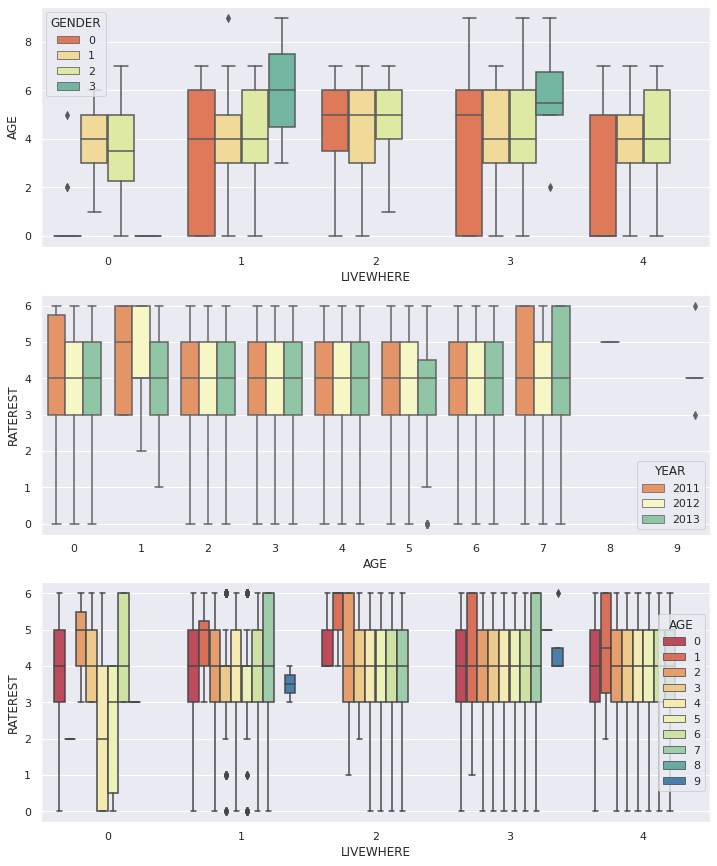

In [40]:
f, axes = plt.subplots(3, 1, figsize=(12, 15))
sns.boxplot('LIVEWHERE', 'AGE', 'GENDER', df, palette=('Spectral'),ax=axes[0])

sns.boxplot('AGE', 'RATEREST', 'YEAR', df, palette=('Spectral'), ax = axes[1])

sns.boxplot('LIVEWHERE', 'RATEREST', 'AGE', df, palette=('Spectral'), ax = axes[2])


In [41]:
data_copy = df.copy()
data_copy.GENDER.value_counts()

2    5016
1    5014
0     482
3      10
Name: GENDER, dtype: int64

In [42]:
data_copy.AGE.value_counts()

3    2356
4    1952
5    1905
6    1721
7    1147
2    1091
0     278
1      65
9       6
8       1
Name: AGE, dtype: int64

In [43]:
data_copy.RATESHOP.value_counts()

4    3234
3    3176
6    1883
5    1209
2     609
0     319
1      92
Name: RATESHOP, dtype: int64

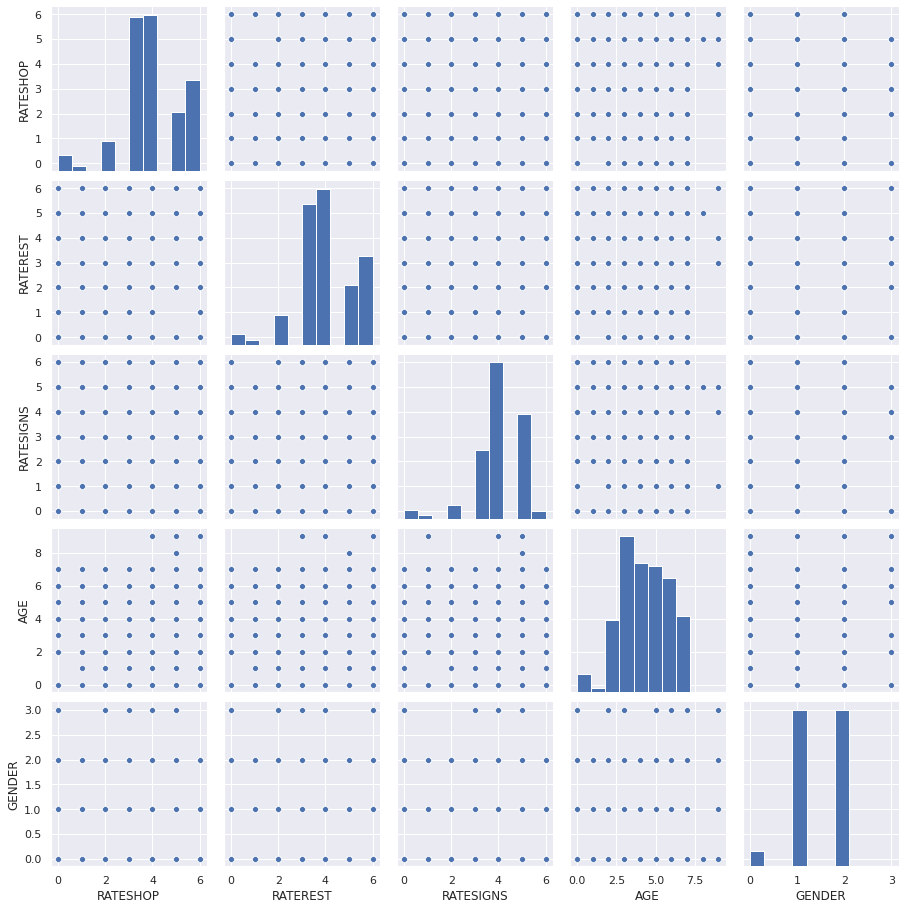

In [44]:
# Pair plot with all the columns
sns.pairplot(data_copy[['RATESHOP', 'RATEREST', 'RATESIGNS', 'AGE', 'GENDER']])

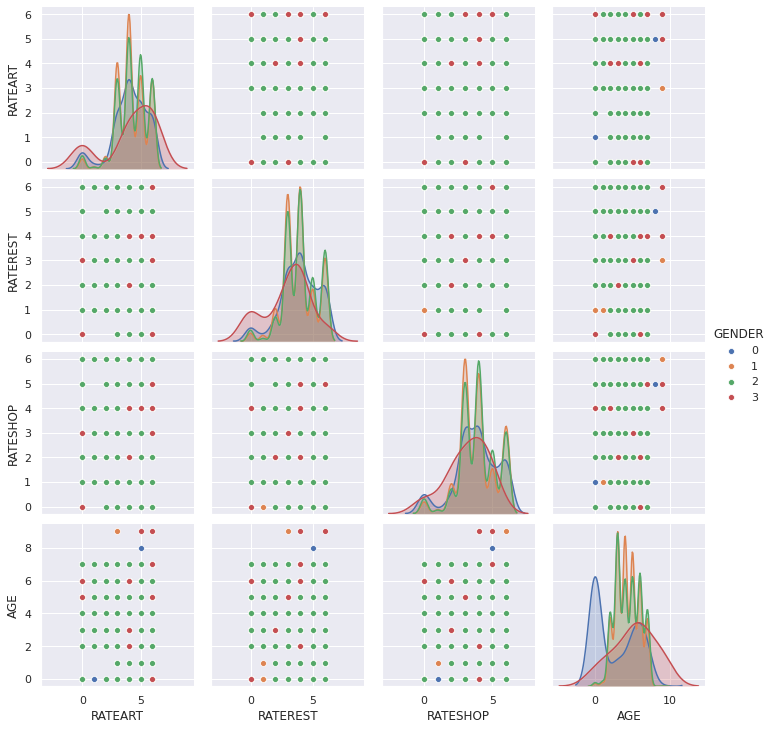

In [46]:

sns.pairplot(df[['RATEART', 'RATEREST', 'RATESHOP', 'GENDER', 'AGE']], hue='GENDER')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


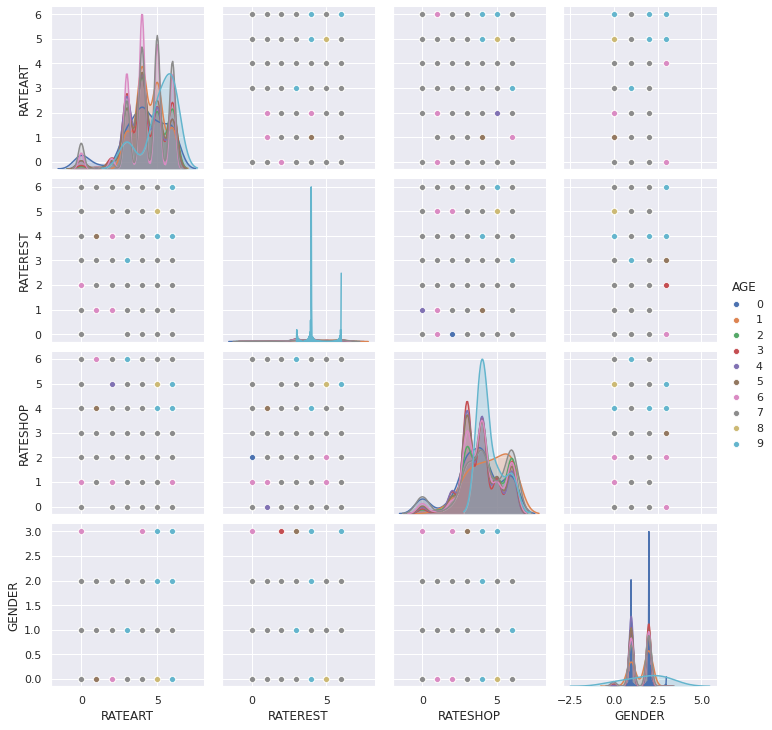

In [47]:
sns.pairplot(df[['RATEART', 'RATEREST', 'RATESHOP', 'GENDER', 'AGE']], hue='AGE')

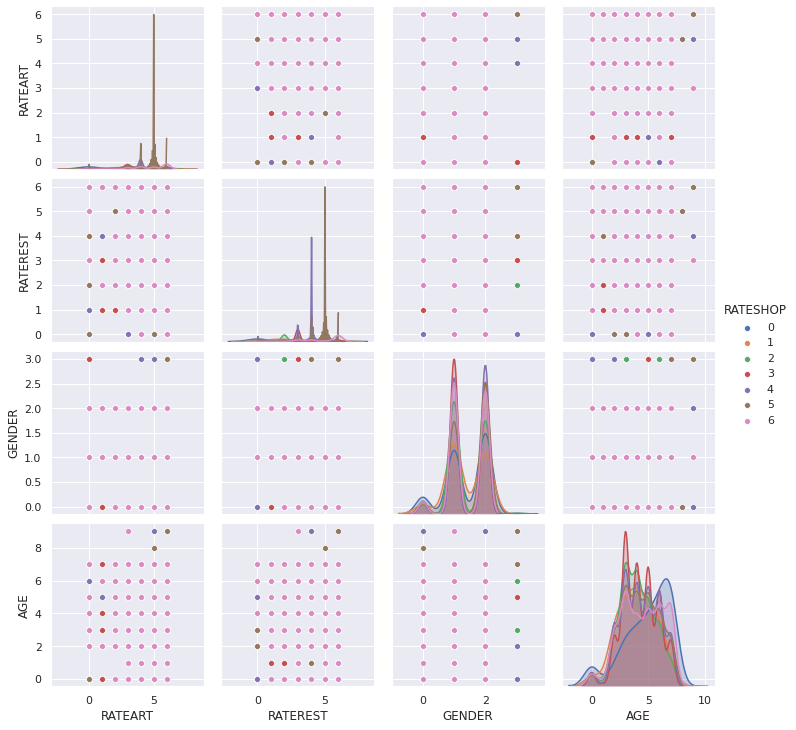

In [48]:
sns.pairplot(df[['RATEART', 'RATEREST', 'RATESHOP', 'GENDER', 'AGE']], hue='RATESHOP')

In [74]:
df_copy1 = df[['LIVEWHERE', 'ISSAFE', 'GENDER', 'RATEREST', 'RATESHOP', 'INCOME', 'RATE', 'AIRLINE']]
df_copy1.corr()

,LIVEWHERE,ISSAFE,GENDER,RATEREST,RATESHOP,INCOME,RATE,AIRLINE
LIVEWHERE,1.000000,-0.011106,0.022465,0.057774,0.054129,-0.028067,-0.019044,0.009026
ISSAFE,-0.011106,1.000000,-0.003885,0.144770,0.143476,0.054093,0.232137,0.009993
GENDER,0.022465,-0.003885,1.000000,0.038356,0.026658,-0.014524,0.040995,0.003895
RATEREST,0.057774,0.144770,0.038356,1.000000,0.587543,-0.045990,0.332846,0.021817
RATESHOP,0.054129,0.143476,0.026658,0.587543,1.000000,-0.048404,0.332282,0.019710
INCOME,-0.028067,0.054093,-0.014524,-0.045990,-0.048404,1.000000,-0.022857,-0.000579
RATE,-0.019044,0.232137,0.040995,0.332846,0.332282,-0.022857,1.000000,0.034974
AIRLINE,0.009026,0.009993,0.003895,0.021817,0.019710,-0.000579,0.034974,1.000000


# Hypothesis

## Questions based on Statistical Evidence

**Are the airlines used by individuals with household income between 50,000 and  100,000 significantly different than 100,001 - 150,000 ?**

In [50]:
pd.DataFrame.from_dict(dict(
    {
        'airlines_pack1':df[df.INCOME == 2].AIRLINE.skew(),    
        'airlines_pack2': df[df.INCOME == 3].AIRLINE.skew(),
    }), orient='index', columns=['Skewness'])

,Skewness
airlines_pack1,-0.430373
airlines_pack2,-0.386733


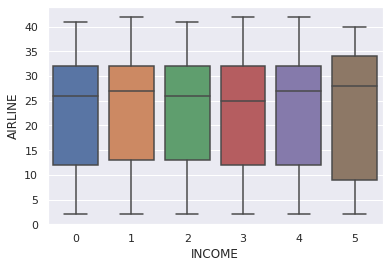

In [51]:
sns.boxplot('INCOME', 'AIRLINE', data=df)

### State Null Hypothesis
**H0** : Airlines companies used by individuals who has (50000-100000) income are same as airlines companies of individuals who has (101000-150000) income
### State alternate hypothesis
**H1** : Airlines companies used by individuals who has (101000-150000) income are significantly different from airlines companies of individuals who has (50000-100000) income 

In [52]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

import scipy.stats as stats

#Split the charges column into two parts between smokers and non-smokers

X = np.array(df[df.INCOME == 2].AIRLINE) #Individuals who has 50 000 - 100 000 income
Y = np.array(df[df.INCOME == 3].AIRLINE) #Individuals who has 101 000 - 150 000 income

#executing the independent t-test to run tests on single variable
t_stat, p_value = stats.ttest_ind(X,Y)

# Setting our significance level at 5%
if p_value < 0.05:  
    printmd(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis. Hence **airlines companies used by individuals who has (50000-100000) income differ significantly from airlines companies used by individuals who has (101000-150000) income**')
else:
    printmd(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis. Hence **airlines companies used by individuals who has (50000-100000) income are same as airlines companies used by individuals who has (101000-150000) income**')

As the p_value **(0.49047933074056227) > 0.05**, we fail to reject Null Hypothesis. Hence **airlines companies used by individuals who has (50000-100000) income are same as airlines companies used by individuals who has (101000-150000) income**

**Does shopping in the airport store of males differ significantly from that of females?**

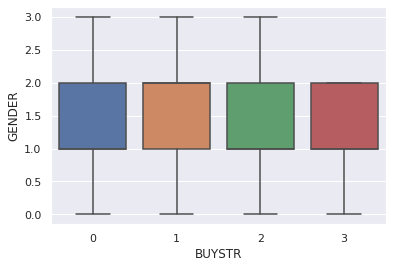

In [53]:
sns.boxplot('BUYSTR', 'GENDER', data=df)

### State null hypothesis
**H0** : Shopping in the airport store of males are significantly different from that of Females
### State alternate hypothesis
**H1** : Shopping in the airport store of males are similar to that of Females

In [54]:
#Split the bmi column into two parts between male and female

X = np.array(df[df.GENDER == 1].BUYSTR) #Males
Y = np.array(df[df.GENDER == 2].BUYSTR) #Females

#executing the independent t-test to run tests on single variable
t_stat, p_value = stats.ttest_ind(X,Y)

# Setting our significance level at 5%
if p_value < 0.05:  
    printmd(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis. Hence **Shopping in the airport store of males are similar to that of Females**')
else:
    printmd(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis. Hence **Shopping in the airport store of males are significantly different from that of Females**')

As the p_value **(2.9920199533360817e-06) < 0.05**, we reject the Null Hypothesis. Hence **Shopping in the airport store of males are similar to that of Females**

**Is the airport airport security distribution same for women who score 3 or less as the general airport?**

In [63]:
subset = df[(df.GENDER == 2) & (df.ISSAFE) & (df.RATE <= 3) & (df.RATE != 0)]

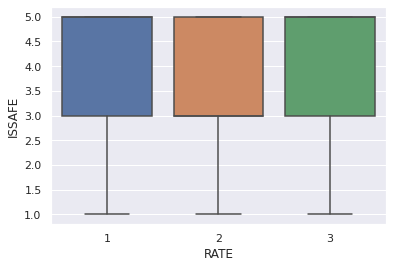

In [64]:
sns.boxplot('RATE', 'ISSAFE', data=subset)

### State null hypothesis
**H0** : Safety point of the airport is uniform across women with have 3 less point for airline
### State alternate hypothesis
**H1** : Safety of the airline is different across women with have 3 or less point for airline

In [67]:
#get the female data 
female_data = df[df['GENDER'] == 2]

#get the bmi samples based on number of children
one_point_safety = female_data[female_data['ISSAFE'] == 1].RATE
two_point_safety = female_data[female_data['ISSAFE'] == 2].RATE
three_point_safety = female_data[female_data['ISSAFE'] == 3].RATE

#Since there are multiple samples and we need to check the variances of multiple samples, choosing ANOVA testing for this

f_stat, p_value = stats.f_oneway(one_point_safety, two_point_safety ,three_point_safety )


# Setting our significance level at 5%
if p_value < 0.05:  
    printmd(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis. Hence **safety point of airport is different across women with gave different points for airline**')
else:
    printmd(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis. Hence **safety point of airport is uniform across women with gave different points for airline**')

As the p_value **(0.6210433705962697) > 0.05**, we fail to reject Null Hypothesis. Hence **safety point of airport is uniform across women with gave different points for airline**